In [27]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import scipy
import tensorflow as tf

train = pd.read_csv("../02_Tf_Digit_Recognition/train.csv")
test  = pd.read_csv("../02_Tf_Digit_Recognition/test.csv")

#print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
#print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

for i in range(100):

    learning_rate = 0.001
    training_iteration = 150
    batch_size = 600
    display_step = 1
    
    trainfv = train.drop(['label'], axis=1).values.astype(dtype=np.float32)
    trainLabels = train['label'].tolist()
    ohtrainLabels = tf.one_hot(trainLabels, depth=10)
    ohtrainLabelsNdarray = tf.Session().run(ohtrainLabels).astype(dtype=np.float64)
    trainfv = np.multiply(trainfv, 1.0 / 255.0) 
    
    testData = test.values
    testData = np.multiply(testData, 1.0 / 255.0)
    
    x = tf.placeholder("float",[None,784])
    y = tf.placeholder("float",[None,10])
    
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    
    with tf.name_scope("Wx_b") as scope:
        model = tf.nn.softmax(tf.matmul(x,W) + b)
        
    w_h = tf.summary.histogram("weights",W)
    b_h = tf.summary.histogram("biases",b)
    
    with tf.name_scope("cost_function") as scope:
        cost_function = -tf.reduce_sum(y * tf.log(model))
        tf.summary.scalar("cost_function",cost_function)
    
    with tf.name_scope("train") as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
    
    #init = tf.initialize_all_variables()
    init = tf.global_variables_initializer()
    
    merged_summary_op = tf.summary.merge_all()
    
    import csv
    import math
    from random import randint
    
    def random_batch(data,labels,size):
        value = math.floor(len(data) / size)    
        intervall = randint(0,value-1)
        return data[intervall*size:intervall*(size+1)],labels[intervall*size:intervall*(size+1)]
    
    with tf.Session() as sess:
        sess.run(init)
        
        for iteration in range(training_iteration):
            avg_cost = 0
            total_batch = int(trainfv.shape[0]/batch_size)
                   
            for i in range(total_batch):
                
                batch_xs,batch_ys = random_batch(trainfv,ohtrainLabelsNdarray,total_batch) 
                sess.run(optimizer,feed_dict={x: batch_xs, y: batch_ys})
                avg_cost += sess.run(cost_function,feed_dict={x: batch_xs, y: batch_ys}) / total_batch
                            
            #if iteration % display_step == 0:
                #print ("Iteration:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(avg_cost))
    
        correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        model_accuracy = sess.run(accuracy, feed_dict={x: trainfv[0:10000], y: ohtrainLabelsNdarray[0:10000]})
        print("\nAccuracy of the current model: ",model_accuracy)
        
        with open('model_accuracy.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow([model_accuracy])


Accuracy of the current model:  0.925

Accuracy of the current model:  0.9244


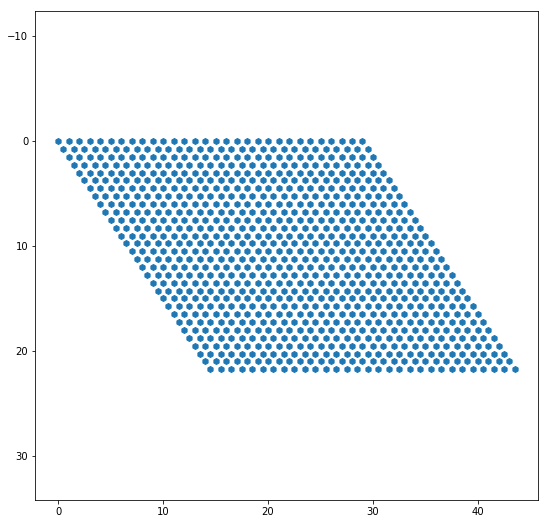

In [1]:
x = []
y = []
for i in range(30):
    for j in range(30):
        x.append(i+0.5*j)
        y.append(0.75*j)

import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.scatter(x, y, marker='h')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

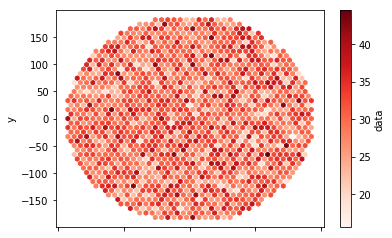

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
#
'''
The script plotts the hexagonal pixels of FACT with their value.
It needs the data-csv in the same folder.
'''

df = pd.read_csv('camera_bild.csv')

df.plot.scatter(x='x', y='y', c='data', cmap=plt.cm.Reds, marker='h')
#df.plot.hexbin(x='x', y='y', C='data', cmap=plt.cm.Reds, gridsize=37)
#plt.gca().set_facecolor('lightgrey')
plt.show()

In [3]:
import numpy as np
np.sort(df['x'].unique())

array([-185.25, -180.5 , -175.75, -171.  , -166.25, -161.5 , -156.75,
       -152.  , -147.25, -142.5 , -137.75, -133.  , -128.25, -123.5 ,
       -118.75, -114.  , -109.25, -104.5 ,  -99.75,  -95.  ,  -90.25,
        -85.5 ,  -80.75,  -76.  ,  -71.25,  -66.5 ,  -61.75,  -57.  ,
        -52.25,  -47.5 ,  -42.75,  -38.  ,  -33.25,  -28.5 ,  -23.75,
        -19.  ,  -14.25,   -9.5 ,   -4.75,   -0.  ,    4.75,    9.5 ,
         14.25,   19.  ,   23.75,   28.5 ,   33.25,   38.  ,   42.75,
         47.5 ,   52.25,   57.  ,   61.75,   66.5 ,   71.25,   76.  ,
         80.75,   85.5 ,   90.25,   95.  ,   99.75,  104.5 ,  109.25,
        114.  ,  118.75,  123.5 ,  128.25,  133.  ,  137.75,  142.5 ,
        147.25,  152.  ,  156.75,  161.5 ,  166.25,  171.  ,  175.75,
        180.5 ,  185.25])

In [4]:
np.sort(df['y'].unique())

array([-180.975, -172.805, -164.54 , -156.275, -148.105, -139.84 ,
       -131.67 , -123.405, -115.14 , -106.97 ,  -98.705,  -90.535,
        -82.27 ,  -74.005,  -65.835,  -57.57 ,  -49.4  ,  -41.135,
        -32.87 ,  -24.7  ,  -16.435,   -8.265,    0.   ,    8.265,
         16.435,   24.7  ,   32.87 ,   41.135,   49.4  ,   57.57 ,
         65.835,   74.005,   82.27 ,   90.535,   98.705,  106.97 ,
        115.14 ,  123.405,  131.67 ,  139.84 ,  148.105,  156.275,
        164.54 ,  172.805,  180.975])

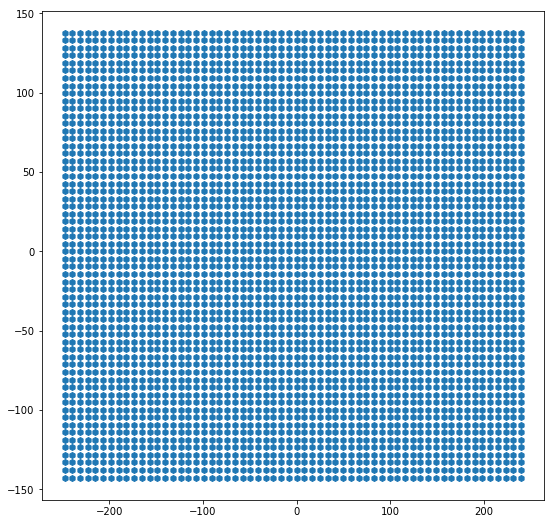

In [5]:
x = []
y = []
for i in np.arange(-8.265*30, 8.265*30, 8.265):
    for j in np.arange(-4.75*30, 4.75*30, 4.75):
        x.append(i)
        y.append(j)
        
plt.figure(figsize=(9,9))
plt.scatter(x, y, marker='h')
plt.show()

In [6]:
for i in np.sort(df['y'].unique()):
    try:
        print(j-i)
        j = i
    except: pass

318.725
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17
-8.265
-8.17
-8.265
-8.265
-8.17


In [46]:
df[(df['x']>-1) & (df['x']<5) & (df['y']>-68) & (df['y']<35)]

,x,y,data
286,4.75,16.435,25.563527
287,4.75,32.870,31.683663
385,4.75,-32.870,24.914886
386,4.75,-16.435,33.437376
390,4.75,0.000,34.170112
391,-0.00,-8.265,37.820994
392,-0.00,8.265,33.530110
426,4.75,-49.400,26.370679
427,-0.00,-57.570,24.982134
428,-0.00,-41.135,34.936084


In [57]:
value_set = set()

for y in df['x'].unique():
    x_values = sorted(df[df['x']==y]['y'].values)
    for i in range(len(x_values)-1):
        value_set.add(round(x_values[i]-x_values[i+1],4))
     
print(value_set)

{-16.530000000000001, -16.434999999999999}


In [58]:
value_set = set()

for y in df['y'].unique():
    x_values = sorted(df[df['y']==y]['x'].values)
    for i in range(len(x_values)-1):
        value_set.add(round(x_values[i]-x_values[i+1],4))
     
print(value_set)

{-9.5}


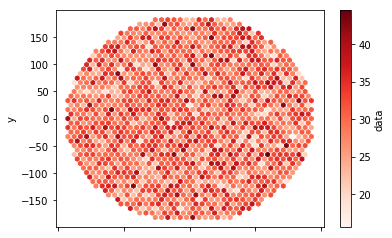

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
#
'''
The script plotts the hexagonal pixels of FACT with their value.
It needs the data-csv in the same folder.
'''

df = pd.read_csv('camera_bild.csv')

df.plot.scatter(x='x', y='y', c='data', cmap=plt.cm.Reds, marker='h')
plt.show()

In [80]:
values = sorted(df[df['y']==0]['x'].values)
print('Every coordinate:\n', values)

values_dict = {}
for i in range(len(values)-1):
    
    #Difference to the next coordinate
    dif = round( values[i] - values[i+1] ,5)
    
    
    if dif in values_dict:
        values_dict[dif] += 1
    else:
        values_dict[dif] = 0
        
        
print('\nDif count:\n',values_dict)

Every coordinate:
 [-185.25, -175.75, -166.25, -156.75, -147.25, -137.75, -128.25, -118.75, -109.25, -99.75, -90.25, -80.75, -71.25, -61.75, -52.25, -42.75, -33.25, -23.75, -14.25, -4.75, 4.75, 14.25, 23.75, 33.25, 42.75, 52.25, 61.75, 71.25, 80.75, 90.25, 99.75, 109.25, 118.75, 128.25, 137.75, 147.25, 156.75, 166.25, 175.75, 185.25]

Dif count:
 {-9.5: 38}


In [79]:
values = sorted(df[df['x']==0]['y'].values)
print('Every coordinate:\n', values)

values_dict = {}
for i in range(len(values)-1):
    
    #Difference to the next coordinate
    dif = round( values[i] - values[i+1] ,5)
    
    
    if dif in values_dict:
        values_dict[dif] += 1
    else:
        values_dict[dif] = 0
        
        
print('\nDif count:\n',values_dict)

Every coordinate:
 [-172.80500000000001, -156.27500000000001, -139.84, -123.405, -106.97, -90.534999999999997, -74.004999999999995, -57.569999999999993, -41.134999999999998, -24.699999999999999, -8.2650000000000006, 8.2650000000000006, 24.699999999999999, 41.134999999999998, 57.569999999999993, 74.004999999999995, 90.534999999999997, 106.97, 123.405, 139.84, 156.27500000000001, 172.80500000000001]

Dif count:
 {-16.530000000000001: 4, -16.434999999999999: 15}
